# Question-8

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [45]:
def median_filter(img,k = 3, s=1, padding=True):
    img = img.astype(np.float64)
    if padding:
        pad_size = k//2
        img = np.pad(img,(pad_size,pad_size),mode='constant')

    h,w = img.shape[0],img.shape[1]
    
    rows = (h - k)//s +1
    cols = (w - k)//s +1
    
    out = np.zeros((rows,cols))
    
    for i in range(rows):
        for j in range(cols):
            out[i,j] = np.median(img[i:i+k,j:j+k])

    return out.astype(np.uint8)

def median_filter3d(img,k = 3, s=1, padding=True):
    out = np.zeros(img.shape)
    for i in range(3):
        out[:,:,i] = median_filter(img[:,:,i],k)
    
    return out.astype(np.uint8)

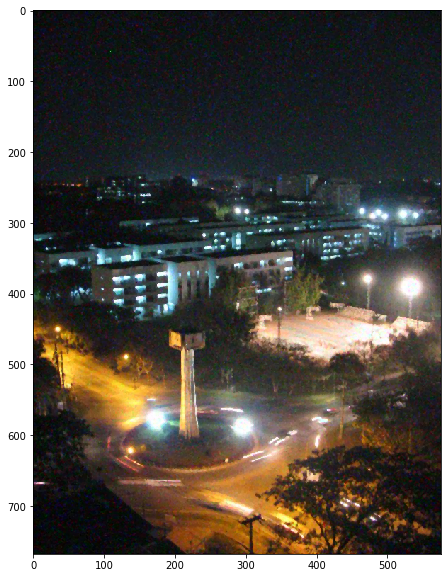

In [46]:
img = cv2.imread('../A2_resources/Degraded.jpg')
out = median_filter3d(img,k=3)
out_rgb = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(out_rgb)
plt.show()

In the input image we can see that the noise is at both high and low level intensities(salt and pepper noise). So, to remove these kind of noises we take the **median of the local neighbourhood** (since **median** is unaffected by some very high and very low values unlike mean). This is called a Median filter. For the given image **Degraded.jpg** I applied a median filter of size 3X3 and the results were good as we can see. If the filter size is increased, the results were almost the same but the computation time get increased.